In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_pd = pd.read_csv('train.csv')
test_pd = pd.read_csv('test.csv')

#display(train_pd.head())
#display(test_pd.head())

In [4]:
train_pd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
survived = train_pd['Survived']
train_pd = train_pd.drop('Survived', axis=1)


In [6]:
train_idx = train_pd['PassengerId']
test_idx = test_pd['PassengerId']

combined_pd = pd.concat([train_pd, test_pd]).reset_index(drop=True)

In [7]:
#display(combined_pd)

In [8]:
print("Null Values in each column:")
print(combined_pd.isnull().sum())

Null Values in each column:
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [9]:
# get values counts of each age.
y = combined_pd['Age'].value_counts()  

In [10]:
# get the index values (ages).
x = y.index.values

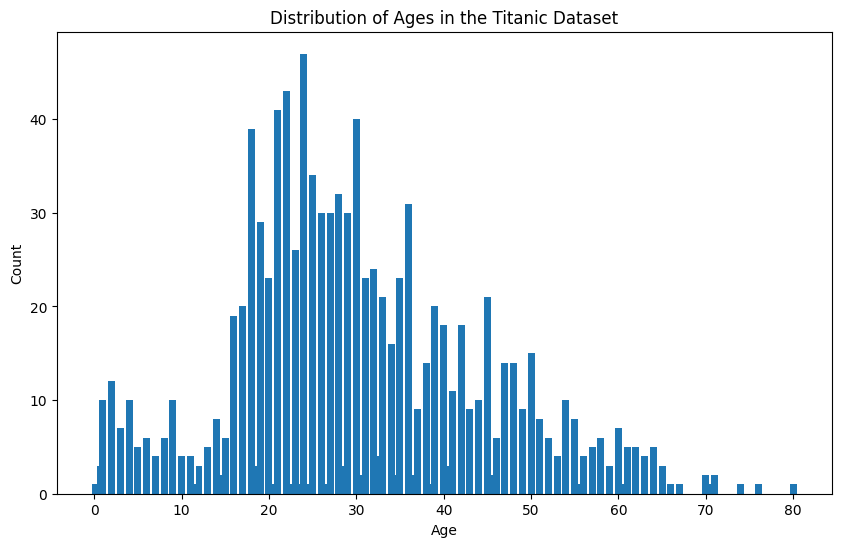

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.title('Distribution of Ages in the Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [12]:
class_age = combined_pd[['Pclass', 'Age']]

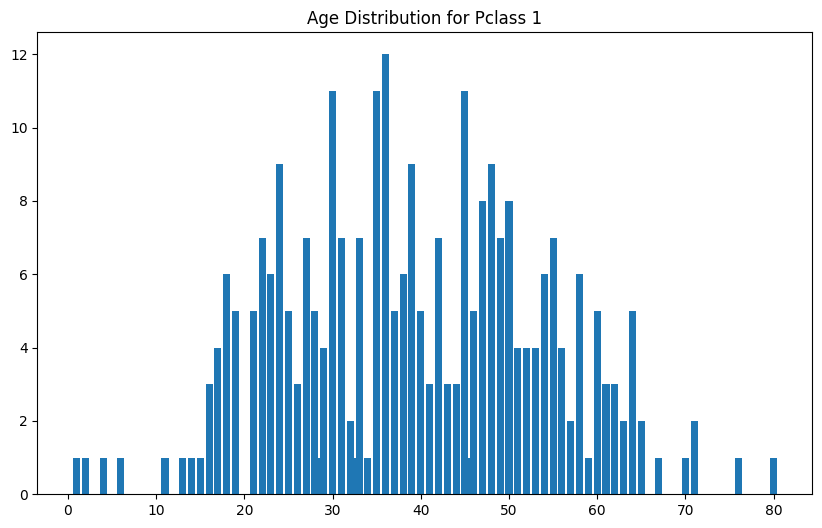

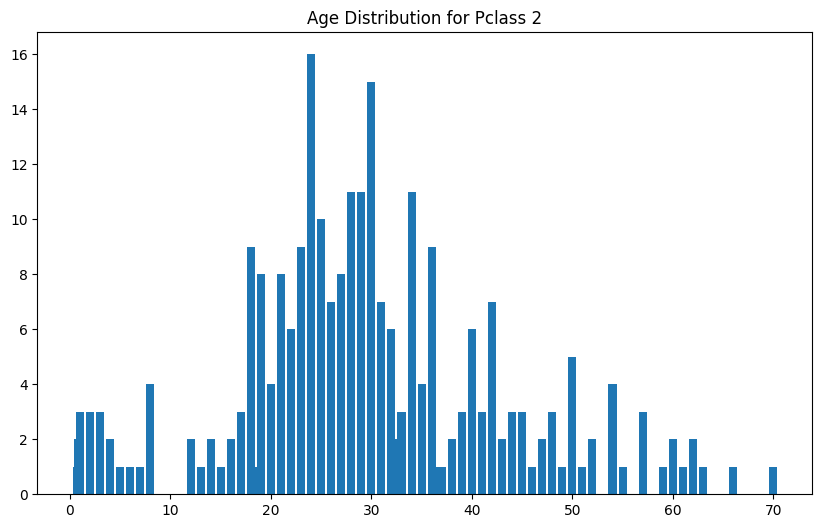

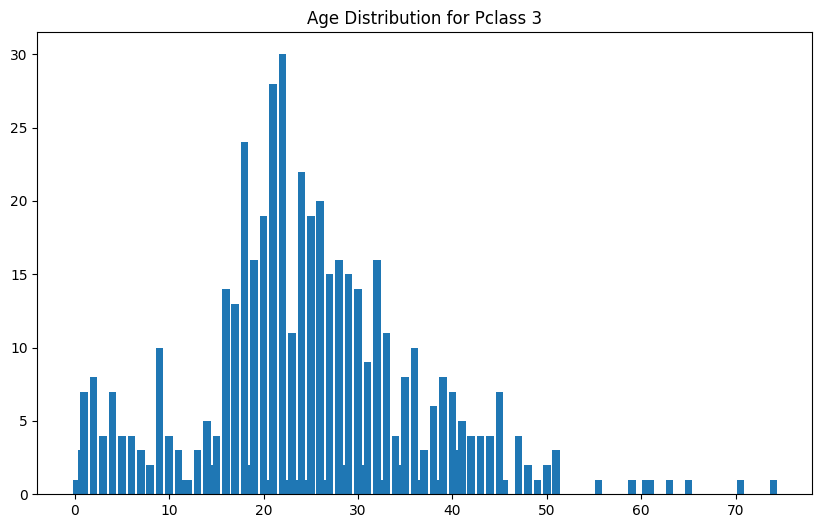

In [13]:
for i in range(1,4):
    plt.figure(figsize=(10, 6))
    plt.title(f'Age Distribution for Pclass {i}')
    y = class_age[class_age['Pclass'] == i]['Age'].value_counts()
    x = y.index.values
    plt.bar(x, y)
    plt.show()

In [14]:
medians = class_age.groupby('Pclass').median()

In [15]:
medians

,Age
Pclass,
1,39.0
2,29.0
3,24.0


In [16]:
for i in range(3):
    idx = np.where( (combined_pd['Pclass'] == i+1) & (combined_pd['Age'].isnull()))[0]
    combined_pd.loc[idx, 'Age'] = medians.values[i][0]
    

In [17]:
print(combined_pd.isnull().sum())

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [18]:
#display the row with null value in the Fare column.
display(combined_pd[combined_pd['Fare'].isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [19]:
#point to remember, if you embarked from the same location with same
#class you will have the same fare. So we can fill the null value with the median of the fare for that class and embarked location.
sim_fare = combined_pd[(combined_pd['Pclass'] == 3) & (combined_pd['Embarked'] == 'S')]['Fare']
sim_fare.median()

np.float64(8.05)

In [20]:
#replace the null value with the median fare for that class and embarked location.
combined_pd.loc[combined_pd['Fare'].isnull(), 'Fare'] = sim_fare.median()

In [21]:
combined_pd[combined_pd['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
#again, if fare is same and class of ticket is same then embarked location will also be same. So we can fill the null value with the median of the embarked location for that class and fare.
sim_embarked = combined_pd[(combined_pd['Pclass'] == 1) & (combined_pd['Fare'] > 70) & (combined_pd['Fare'] <= 90)]['Embarked']

In [23]:
print(sim_embarked.value_counts())

Embarked
C    29
S    25
Q     3
Name: count, dtype: int64


In [24]:
# highest occuring value is C so we can fill the null value with C.
combined_pd.loc[combined_pd['Embarked'].isnull(), 'Embarked'] = 'C'

In [25]:
# now we do something for the cabin column.
# we fill it with a value M for missing.
combined_pd['Cabin'] = combined_pd['Cabin'].fillna('M')
#now we take the first letter of the cabin and make it a new column.
combined_pd['Cabin'] = combined_pd['Cabin'].str[0]
#we show the value counts of the cabin column.
print(combined_pd['Cabin'].value_counts())

Cabin
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


In [26]:
# we add T to the Missing as we don't know what it means.
combined_pd.loc[combined_pd['Cabin'] == 'T', 'Cabin'] = 'M'
print(combined_pd['Cabin'].value_counts())

Cabin
M    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: count, dtype: int64


In [27]:
combined_pd.isnull().sum()  

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data Feature Engineering

In [28]:
print(combined_pd.nunique())

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin             8
Embarked          3
dtype: int64


In [29]:
#we start with the names column.
combined_pd['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [30]:
names = combined_pd['Name']
last_names = []
titles = []
first_names = []

for name in names:
    if ',' not in name:
        last_names.append('')
    else:
        last, name = name.split(',', 1)
        last_names.append(last.strip())
    if '.' not in name:
        titles.append('')
    else:
        title, first = name.split('.', 1)
        titles.append(title.strip())
        first_names.append(first.strip())
last_names = np.array(last_names)
titles = np.array(titles)
first_names = np.array(first_names)


np.unique(titles, return_counts=True)
    

(array(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major',
        'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
        'the Countess'], dtype='<U12'),
 array([  1,   4,   1,   1,   8,   1,   1,   2,  61, 260,   2,   1, 757,
        197,   2,   8,   1,   1]))

In [31]:
idx = np.where(np.isin(titles, ['Capt', 'Col', 'Major']))
titles[idx] = 'Military'

In [32]:
idx = np.where(np.isin(titles, ['Don', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Master', 'the Countess']))
titles[idx] = 'Nobility'


In [33]:
idx = np.where(np.isin(titles, ['Ms', 'Mlle', 'Miss']))
titles[idx] = 'Ms'

In [34]:
idx = np.where(np.isin(titles, ['Mrs', 'Mme']))
titles[idx] = 'Mrs'

In [35]:
np.unique(titles)

array(['Dr', 'Military', 'Mr', 'Mrs', 'Ms', 'Nobility', 'Rev'],
      dtype='<U12')

In [36]:
combined_pd['Title'] = titles

In [37]:
combined_pd.nunique()

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin             8
Embarked          3
Title             7
dtype: int64

In [38]:
# titles = combined_pd['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
# titles_list = titles.unique().tolist()
# titles_list

In [39]:
# title_mapping = {
#     'Capt': 'Military',
#     'Col': 'Military',
#     'Major': 'Military',

#     'Don': 'Nobility',
#     'Dona': 'Nobility',
#     'Jonkheer': 'Nobility',
#     'Lady': 'Nobility',
#     'Sir': 'Nobility',
#     'Master': 'Nobility',
#     'the Countess': 'Nobility',

#     'Miss': 'Ms',
#     'Mlle': 'Ms',
#     'Ms': 'Ms',

#     'Mrs': 'Mrs',
#     'Mme': 'Mrs'
# }

# combined_pd['title'] = (
#     combined_pd['Name']
#     .str.split(',').str[1]
#     .str.split('.').str[0]
#     .str.strip()
#     .map(lambda t: title_mapping.get(t, t))  # keep rest as-is
# )


In [40]:
#display(combined_pd)

In [41]:
combined_pd['Title'].isnull().sum()

np.int64(0)

In [42]:
#lets make bin for ages column.
bins = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])
combined_pd['age_bin'] = pd.cut(combined_pd['Age'], bins)


In [43]:
#we are going to check if there are any tickets with same ticket number.
#because if there are tickets with same number we might want to adjust the fare.
ticket_dict = dict(combined_pd['Ticket'].value_counts())

In [44]:
combined_pd['tkt_count'] = combined_pd['Ticket'].map(ticket_dict)   

In [45]:
combined_pd['Fare_per_ticket'] = combined_pd['Fare'] / combined_pd['tkt_count']

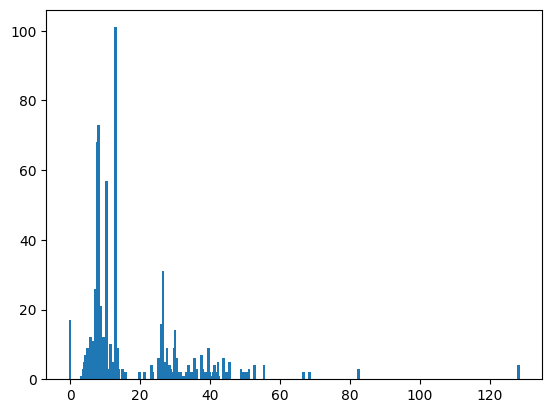

In [46]:
plt.bar(combined_pd['Fare_per_ticket'].value_counts().index.values, combined_pd['Fare_per_ticket'].value_counts())
plt.show()

In [47]:
bins = [0, 20, 40, 60, 80, 150]
combined_pd['Fare_bin'] = pd.cut(combined_pd['Fare_per_ticket'], bins)

In [48]:
combined_pd['num_family'] = combined_pd['SibSp'] + combined_pd['Parch'] + 1

In [49]:
combined_pd.drop(['Name', 'Age', 'Ticket', 'Fare', 'tkt_count', 'Fare_per_ticket'], axis=1, inplace=True)

In [50]:
combined_pd.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,age_bin,Fare_bin,num_family
0,1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
1,2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
2,3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
3,4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
4,5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1


# sklearn

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


In [53]:
combined_pd.set_index('PassengerId', inplace=True)

In [54]:
label_enc = combined_pd.copy()

In [55]:
# label_enc = label_enc.astype(str)

In [56]:
# label_enc = label_enc.apply(LabelEncoder().fit_transform)

In [57]:
# label_enc.head()

In [58]:
#  define text columns
categorical_cols = ['Sex', 'Cabin', 'Embarked', 'Title', 
                    'age_bin', 'Fare_bin']

# encode only text columns
for col in categorical_cols:
    label_enc[col] = LabelEncoder().fit_transform(
                     label_enc[col].astype(str))

In [59]:
one_hot = label_enc.copy()
one_hot = pd.get_dummies(one_hot, columns=['Sex', 'Embarked', 'Title']).astype(int)


In [60]:
one_hot.head()

,Pclass,SibSp,Parch,Cabin,age_bin,Fare_bin,num_family,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
PassengerId,,,,,,,,,,,,,,,,,,,
1,3,1,0,7,2,0,2,0,1,0,0,1,0,0,1,0,0,0,0
2,1,1,0,2,3,1,2,1,0,1,0,0,0,0,0,1,0,0,0
3,3,0,0,7,2,0,1,1,0,0,0,1,0,0,0,0,1,0,0
4,1,1,0,2,3,1,2,1,0,0,0,1,0,0,0,1,0,0,0
5,3,0,0,7,3,0,1,0,1,0,0,1,0,0,1,0,0,0,0


In [61]:
#Now combine the Survived column back to the one_hot dataframe.
# X = one_hot.iloc[train_idx].values
X = one_hot.loc[train_idx].values
y = survived.values

In [62]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)    

In [64]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(712, 19) (712,) (179, 19) (179,)


In [65]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)


0.8268156424581006